In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from rqdatac import *
init()

1min 32s ± 5.54 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


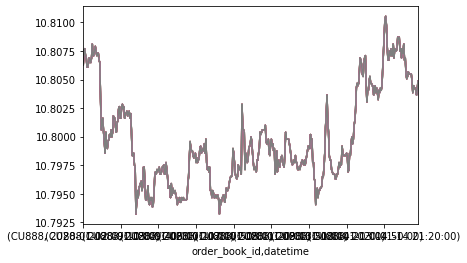

In [4]:

daily_price = get_price(
                ['CU888'], 
                start_date="2020-1-1", 
                end_date='2020-1-15',
                fields='close',
                frequency='10m',
                expect_df=True,
                )

daily_price['INDX_log']=list(map(lambda x:math.log(float(x)),daily_price.iloc[:,0]))
daily_price['INDX_log'].plot()
daily_price['peak']=list(map(lambda x:0,daily_price.iloc[:,0]))
daily_price['trough']=list(map(lambda x:0,daily_price.iloc[:,0]))

#daily_price['peak'][1]=daily_price['peak'][1]
for j in range(130,len(daily_price)-1):
    for i in range(j-1, j-130, -1):
        increase=1
        for k in range(i+1,j-1):
            a1 = daily_price['INDX_log'][k]
            a2 = daily_price['INDX_log'][i]
            a2 = a2+((k-i)/(j-i))*(daily_price['INDX_log'][j]-daily_price['INDX_log'][i])
            #print(a1)
            #print(a2)
            if a1-a2>0:
                increase=0
                break
        #print(increase)
        
        daily_price.loc[daily_price.index[j],'peak'] = daily_price.loc[daily_price.index[j],'peak'] + increase
for j in range(130,len(daily_price)-1):
    for i in range(j-1, j-130, -1):
        increase=1
        for k in range(i+1,j-1):
            a1 = daily_price['INDX_log'][k]
            a2 = daily_price['INDX_log'][i]
            a2 = a2+((k-i)/(j-i))*(daily_price['INDX_log'][j]-daily_price['INDX_log'][i])
            #print(a1)
            #print(a2)
            if a1-a2<0:
                increase=0
                break
        daily_price.loc[daily_price.index[j],'trough'] = daily_price.loc[daily_price.index[j],'trough'] + increase
daily_price

In [9]:
dp = daily_price
dp['INDX_log']=list(daily_price['INDX_log'])
dp['peak']=list(daily_price['peak'])
dp['trough']=list(daily_price['trough'])

for i in range(0,len(dp)):
    if dp.loc[dp.index[i],'peak']<64:
        dp.loc[dp.index[i],'peak']=np.nan
    if dp.loc[dp.index[i],'peak']>63:
        dp.loc[dp.index[i],'peak']=dp.loc[dp.index[i],'close']
    if dp.loc[dp.index[i],'trough']<64:
        dp.loc[dp.index[i],'trough']=np.nan
    if dp.loc[dp.index[i],'trough']>63:
        dp.loc[dp.index[i],'trough']=dp.loc[dp.index[i],'close']   

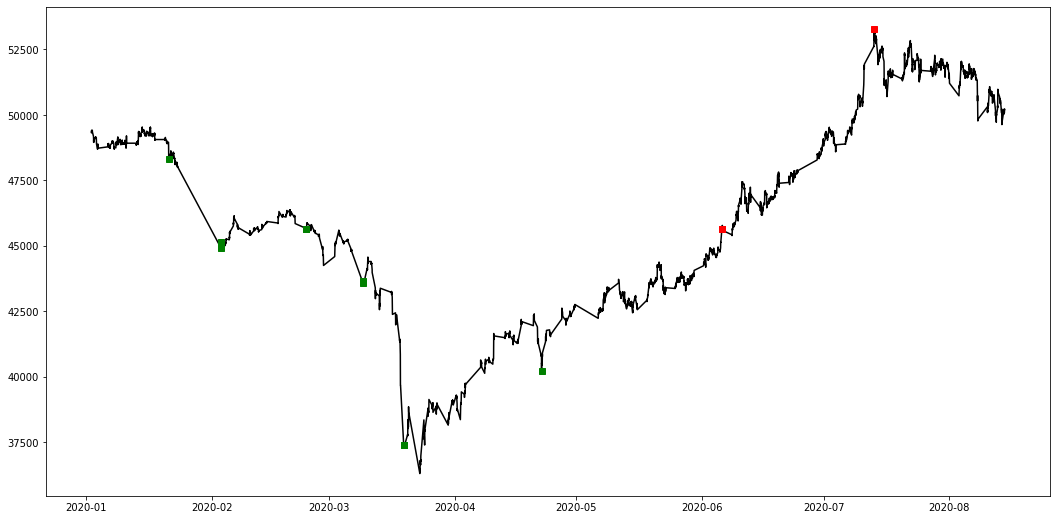

In [10]:
dp = dp.droplevel(0)
plt.figure(figsize=(18,9))
plt.plot( dp.index, dp['close'], 'k-', dp.index, dp['peak'], 'rs', dp.index, dp['trough'], 'gs')

In [37]:
# dp.to_csv("666.CSV")

In [16]:
dp[dp['peak'].notnull()|dp['trough'].notnull()]

,close,INDX_log,peak,trough
datetime,,,,
2020-01-21 10:40:00,48320.0,10.785601,NaN,48320.0
2020-02-03 09:10:00,44900.0,10.712193,NaN,44900.0
2020-02-03 09:20:00,45130.0,10.717302,NaN,45130.0
2020-02-24 09:10:00,45660.0,10.728978,NaN,45660.0
2020-02-24 09:20:00,45640.0,10.728540,NaN,45640.0
2020-03-09 09:10:00,43570.0,10.682124,NaN,43570.0
2020-03-09 09:20:00,43660.0,10.684188,NaN,43660.0
2020-03-19 09:10:00,37380.0,10.528891,NaN,37380.0
2020-03-19 09:20:00,37380.0,10.528891,NaN,37380.0
